In [1]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

#### 1. Helper function to calculate p-value

In [2]:
def GetPvalue(nbkg,nsigNbkg):
    integral=1.
    x = np.arange(nsigNbkg)
    mu = nbkg
    y1 = poisson(mu).pmf(x)
    p_value = 1 - y1.sum()
    return p_value

#### This is visualized example show how the upper code works  
 - Visualied image is the Poisson dist of Null hypothesis ( Nbkg )
 - P-valye is 1 - filled area

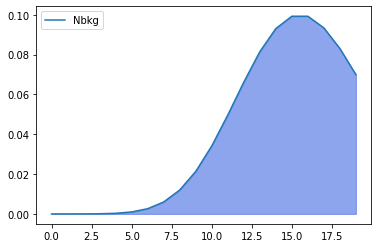

In [3]:
## Poisson dist
x = np.arange(20)
mu = 16
y1 = poisson(mu).pmf(x)
plt.plot(x,y1,label='Nbkg')
plt.fill_between(x,y1,color='royalblue',alpha=0.6)
plt.legend()

#### 2. Define your Lumi,xsec,Gen,Selected events

In [4]:
Lumi_arr = np.arange(35,300,1) * 1000
Genbkg = 1000.; Selbkg = 20; xsecbkg=50
Gensig = 1000.; Selsig = 3; xsecsig=0.01


bkg_yield_arr = Selbkg * xsecbkg / Genbkg * Lumi_arr
sig_yield_arr = Selsig * xsecsig / Gensig * Lumi_arr
sigNbkg_yield_arr = bkg_yield_arr + sig_yield_arr

#### 3. Calculate p-value

In [5]:
vectorized_pvalue = np.vectorize(GetPvalue)
p_value_arr = vectorized_pvalue(bkg_yield_arr,sigNbkg_yield_arr)
#print(p_value_arr)

Text(0, 0.5, 'P-value')

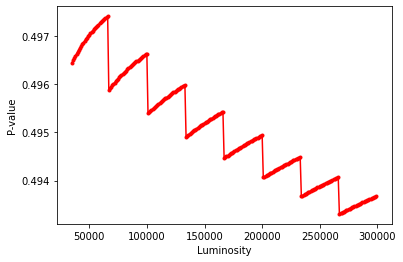

In [8]:
plt.plot(Lumi_arr,p_value_arr,'r.-')
plt.xlabel('Luminosity')
plt.ylabel('P-value')